# Kernel Ridge Regression

Let's first simulate a 2D nonlinear functions as follow. The goal of this task is to predict the true function by observing few samples from it.


In [2]:
import numpy as np

def create2Dsurface(x,y):
    z = x*np.exp(-x**2-y**2) 
    return z


### Create Training Data
To do this, we will create our training dataset and visulaize the as follow:




In [3]:
import matplotlib.pyplot as plt

n = 400
x = np.random.rand(n)
y = np.random.rand(n)
Ztrue = create2Dsurface(x,y)
y_train = Ztrue+np.random.randn(n)*0.1
X_train = np.concatenate((x.flatten()[:,np.newaxis],y.flatten()[:,np.newaxis]),axis=1)
#print(y_train.shape)
#print(X_train.shape)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.colorbar()
plt.show()

### Create Testing Data
We will create our Testing dataset based on the 2D meshgrid and visulaize the image of this 2D surface

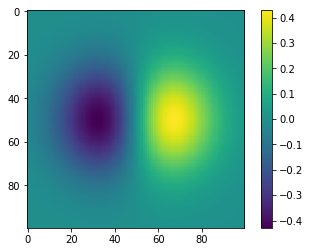

In [4]:
ntest = 100
ti = np.linspace(-2.0, 2.0, ntest)
x1test, x2test = np.meshgrid(ti, ti)

X_test = np.concatenate((x1test.flatten()[:,np.newaxis],x2test.flatten()[:,np.newaxis]),axis=1)
y_test = create2Dsurface(x1test,x2test).flatten()
plt.imshow(y_test.reshape((ntest,ntest)))
plt.colorbar()
plt.show()

In [5]:
# print(y_train.shape)
# print(X_train.shape)
# print(X_test.shape)
# print(y_test.shape)

## Let's try the Linear Regression on the dataset
Please implement linear regression from [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to fit y_train (z) from X_train (x and y).
Please use the testind data X_test and y_test and 
 1. Visualize the final fitting result (For the visualization, please follow the testing plot for y_test)
 2. Compute the mean-square error for the linear regression for the testing samples.



Mean Squared Error is  0.21612470191458197


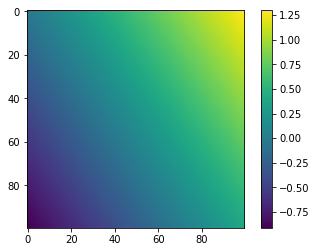

the training accuracy is: 0.5369776048318367
the testing accuracy is: -7.993697159704507


In [6]:
import sklearn.linear_model as skl_lm
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
regr = skl_lm.LinearRegression()
fm = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Squared Error is ',mean_squared_error(y_test,y_pred))
#x1  = X_test.as_matrix()
#print(X_test.shape)
plt.imshow(y_pred.reshape((ntest,ntest)))
plt.colorbar()
plt.show()
print("the training accuracy is:",regr.score(X_train,y_train))
print("the testing accuracy is:",regr.score(X_test, y_test))


## Let's try the Kernel Ridge Regression on the dataset
Please implement Kernel Ridge regression from [sklearn](http://scikit-learn.org/stable/modules/kernel_ridge.html) to fit y_train (z) from X_train (x and y).
Please use the testind data X_test and y_test and 
 1. Use tuning parameter selection to select the best kernel bandwidth and regularization constance
 1. Visualize the final fitting result
 2. Compute the mean-square error for the kernel ridge regression for the testing samples.



{'alpha': 1, 'gamma': 1}


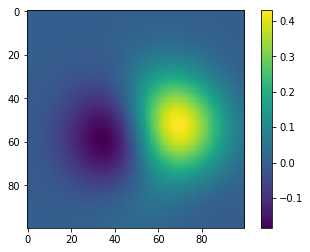

Mean Squared Error is  0.006043474145028984


In [7]:
from sklearn.kernel_ridge import KernelRidge

from sklearn.model_selection import GridSearchCV
alpha1 = [0.01,0.1,1,10]
gamma1= [0.1,1,10]
param_grid = { 'alpha': alpha1, 'gamma' : gamma1}
clf3 = KernelRidge(kernel='rbf')
kr = GridSearchCV(clf3,param_grid, return_train_score = True, cv=5)
kr.fit(X_train, y_train) 
print(kr.best_params_)
y_pred = kr.predict(X_test)
plt.imshow(y_pred.reshape((ntest,ntest)))
plt.colorbar()
plt.show()
print('Mean Squared Error is ',mean_squared_error(y_test,y_pred))


In [8]:
from sklearn.metrics import accuracy_score
print("the training accuracy is:",kr.score(X_train,y_train))
print("the testing accuracy is:",kr.score(X_test, y_test))


the training accuracy is: 0.6372077952099748
the testing accuracy is: 0.7485101158201872


## (Bonus) Let's try the Random Forest Regression on the dataset 
Please implement Random Forest Regression from [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to fit y_train (z) from X_train (x and y). We have not talked about Random Forest Regression, but it is very similar to random forest classifier. 

Please use the testind data X_test and y_test 
 1. Use tuning parameter selection to select the best tree depth and n_estimator
 1. Visualize the final fitting result
 2. Compute the mean-square error for the kernel ridge regression for the testing samples.



best parameters: {'max_depth': 4, 'n_estimators': 4}


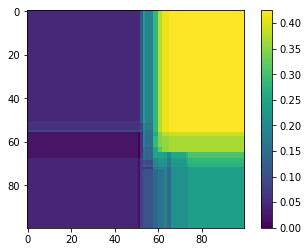

Mean Squared Error is  0.04804597030173523
the training accuracy is: 0.6911796014833427
the testing accuracy is: 0.9993591792609825


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
n_samples=300
X, y = make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
from sklearn.model_selection import GridSearchCV
datasets = [make_moons(n_samples=n_samples,noise=0.3, random_state=0),
            make_circles(n_samples=n_samples,noise=0.2, factor=0.5, random_state=1),linearly_separable]
depthsi = [1,2,4,8,16,32,64]
ntrees = [1,2,4,8,16,32,64]
parameters1 = {'max_depth':depthsi, 'n_estimators':ntrees}
rfc1 = RandomForestRegressor(max_depth=depthsi,n_estimators = ntrees)
clf1 = GridSearchCV(rfc1, parameters1,return_train_score=True)
clf1.fit(X_train, y_train)
print('best parameters:',clf1.best_params_)
y_pred1= clf1.predict(X_test)
plt.imshow(y_pred1.reshape((ntest,ntest)))
plt.colorbar()
plt.show()
print('Mean Squared Error is ',mean_squared_error(y_test,y_pred1))
print("the training accuracy is:",clf1.score(X_train,y_train))
print("the testing accuracy is:",abs(clf1.score(X_test, y_test)))
